In [ ]:
## Join the Duet Server the Data Owner 1 connected to

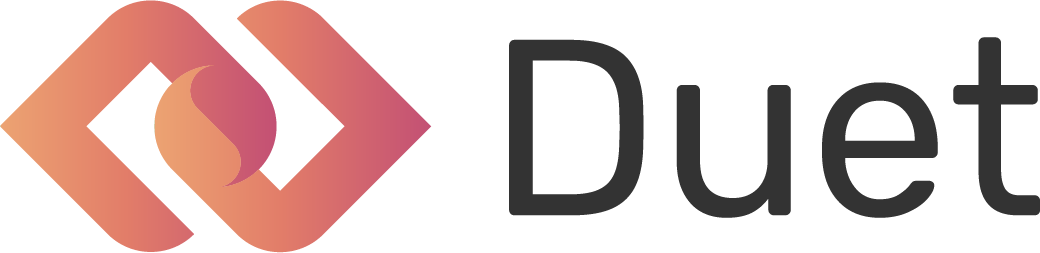

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet1 = sy.join_duet(loopback=True)
import matplotlib.pyplot as plt
import torch

## Join the Duet Server the Data Owner 2 connected to

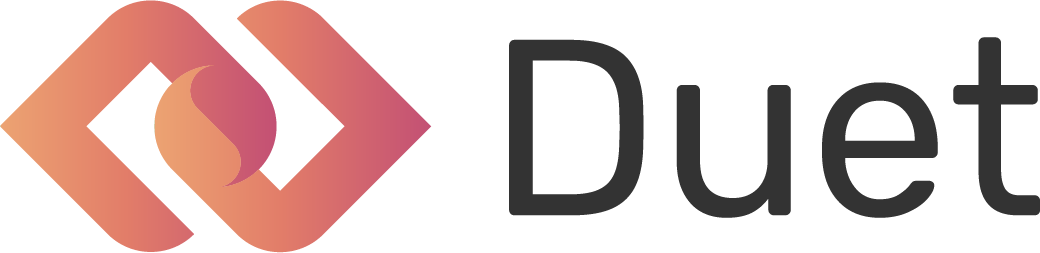

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [2]:
duet2 = sy.join_duet(loopback=True)

In [3]:
duet1.store.pandas

,ID,Tags,Description,object_type
0,<UID: 8933d6f9eb784a94b58f1ff1fb767ace>,[data],dataset of speed and round trip time used for ...,<class 'torch.Tensor'>


In [4]:
duet2.store.pandas

,ID,Tags,Description,object_type
0,<UID: 814c5b42d2ec44128e92c6005c751951>,[data],dataset of speed and round trip time used for ...,<class 'torch.Tensor'>


## Linear regression

In [5]:
data1_ptr = duet1.store[0]
data2_ptr = duet2.store[0]

print(data1_ptr)
print(data2_ptr)

### Create Base Model

In [6]:
in_dim = 1
out_dim = 1

In [7]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        self.linear = self.torch_ref.nn.Linear(in_dim, out_dim)

    def forward(self, x):
        x = self.linear(x)
        return x

### Training

In [8]:
def train(iterations, model, torch_ref, optim, data1_ptr, target1_ptr):

    losses = []

    for i in range(iterations):

        optim.zero_grad()

        output = model(data1_ptr)

        loss = torch_ref.nn.functional.mse_loss(output, target1_ptr)

        loss_item = loss.item()

        loss_value = loss_item.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

        print("Epoch", i, "loss", loss_value)

        losses.append(loss_value)

        loss.backward()

        optim.step()

    return losses

#### Send one copy of the model to each data owner or client and train them remotely one by one

In [9]:
import torch as th
import numpy as np

In [10]:
base_model = SyNet(torch)

Training of Data Owner 1 data

In [11]:
remote_model1 = base_model.send(duet1)

In [12]:
remote_torch1 = duet1.torch
params = remote_model1.parameters()
optim1 = remote_torch1.optim.Adam(params=params, lr=0.01)

In [13]:
target1_ptr = th.FloatTensor(np.array([
3.18,3.48,3.01,3.45,3.36,4.07,3.81,3.64,3.74,3.96,4.01,3.76,3.88,3.62,3.94,3.84,4.02,
4.07,3.64,3.83,3.65,3.89,3.58,3.75,3.64,3.55,4.06,2.86,0.69,3.92,5.25,3.33,3.23,3.32,
3.36,3.37,3.42,3.28,3.20,3.00,3.34,3.09,3.37,2.98,3.25,3.09,2.53,3.36,2.966,2.77,
3.22,3.56,2.89,3.23,3.28,3.17,3.11,3.07,3.2,2.92,3.23,3.19,3.33,3.03,2.65,3.14,
3.18,3.15,3.4,3.18,3.59,3.25,3.27,3.40,3.77,3.09,3.21,3.22,3.11,3.25,3.22,3.35,
3.38,3.23,3.29,3.44,3.61,3.31,3.44,3.54,3.58,3.17,3.45,3.38,3.66,3.34,1.75,3.39,3.81,3.58,
3.80,3.44,3.54,3.13,3.42,3.4,3.46,3.45,3.63,3.3,3.44,3.60,3.61,3.45,3.64,3.55,3.61,
4.57,4.27,4.22,4.58,4.41,4.29,4.44,4.12,4.85,4.52,4.52,4.7,4.06,4.54,4.55,4.53,4.47,
4.43,4.44,4.50,4.4,3.55,4.49,4.42,4.75,4.17,4.28]).reshape(-1, 1))
target1_ptr.shape

torch.Size([144, 1])

In [14]:
target1_ptr

tensor([[3.1800],
        [3.4800],
        [3.0100],
        [3.4500],
        [3.3600],
        [4.0700],
        [3.8100],
        [3.6400],
        [3.7400],
        [3.9600],
        [4.0100],
        [3.7600],
        [3.8800],
        [3.6200],
        [3.9400],
        [3.8400],
        [4.0200],
        [4.0700],
        [3.6400],
        [3.8300],
        [3.6500],
        [3.8900],
        [3.5800],
        [3.7500],
        [3.6400],
        [3.5500],
        [4.0600],
        [2.8600],
        [0.6900],
        [3.9200],
        [5.2500],
        [3.3300],
        [3.2300],
        [3.3200],
        [3.3600],
        [3.3700],
        [3.4200],
        [3.2800],
        [3.2000],
        [3.0000],
        [3.3400],
        [3.0900],
        [3.3700],
        [2.9800],
        [3.2500],
        [3.0900],
        [2.5300],
        [3.3600],
        [2.9660],
        [2.7700],
        [3.2200],
        [3.5600],
        [2.8900],
        [3.2300],
        [3.2800],
        [3

In [15]:
iteration = 10
losses = train(iteration, remote_model1, remote_torch1, optim1, data1_ptr, target1_ptr)

Epoch 0 loss 9.25740909576416
Epoch 1 loss 8.985282897949219
Epoch 2 loss 8.719341278076172
Epoch 3 loss 8.459686279296875
Epoch 4 loss 8.206414222717285
Epoch 5 loss 7.9596099853515625
Epoch 6 loss 7.719351768493652
Epoch 7 loss 7.485710144042969
Epoch 8 loss 7.25874137878418
Epoch 9 loss 7.038497447967529


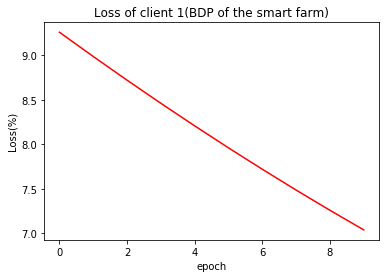

In [16]:
plt.title('Loss of client 1(BDP of the smart farm)')
plt.plot(losses, color='red')
plt.ylabel("Loss(%)")
plt.xlabel("epoch")
plt.show()

Training of Data Owner 2 data

In [17]:
remote_model2 = base_model.send(duet2)

In [18]:
remote_torch2 = duet2.torch
params = remote_model2.parameters()
optim2 = remote_torch2.optim.Adam(params=params, lr=0.1)

In [19]:
target2_ptr = th.FloatTensor(np.array([3.22,3.38,3.28,3.20,3.26,3.32,3.25,3.41,3.12,3.56,3.23,3.33,3.51,3.32,3.34,3.32,3.29,2.51,3.11,3.41,2.56,3.03,3.09,
3.14,3.24,3.33,3.26,3.28,3.74,4.00,4.85,4.41,4.53,5.03,4.27,4.42,4.98,4.36,4.79,4.54,3.28,4.89,4.00,4.67,4.52,4.61,
3.96,5.01,4.58,4.42,4.43,7.48,6.19,6.53,6.55,7.93,5.54,4.18,9.44,4.92,3.78,2.72,4.40,4.42,4.67,4.35,4.73,3.86,4.35,
4.62,4.44,4.19,4.59,4.07,4.83,4.31,4.29,4.60,4.37,4.21,4.64,4.28,4.20,4.44,4.22,4.81,4.11,4.12,4.67,4.19,4.69,3.96,
4.31,4.75,4.30,4.52,4.60,4.45,4.76,4.32,3.98,4.35,4.24,4.70,4.41,4.44,4.78,4.35,4.43,4.73,4.44,4.44,3.87,4.15,4.85,
4.39,3.88,4.82,3.78,4.82,4.34,4.29,4.39,4.33,4.50,4.72,4.24,4.57,4.32,4.38,4.83,4.43,4.52,4.03,4.01,4.25,4.01,3.95,
4.26,3.91,4.22,4.01,3.91,4.56 ]).reshape(-1, 1))
target2_ptr

tensor([[3.2200],
        [3.3800],
        [3.2800],
        [3.2000],
        [3.2600],
        [3.3200],
        [3.2500],
        [3.4100],
        [3.1200],
        [3.5600],
        [3.2300],
        [3.3300],
        [3.5100],
        [3.3200],
        [3.3400],
        [3.3200],
        [3.2900],
        [2.5100],
        [3.1100],
        [3.4100],
        [2.5600],
        [3.0300],
        [3.0900],
        [3.1400],
        [3.2400],
        [3.3300],
        [3.2600],
        [3.2800],
        [3.7400],
        [4.0000],
        [4.8500],
        [4.4100],
        [4.5300],
        [5.0300],
        [4.2700],
        [4.4200],
        [4.9800],
        [4.3600],
        [4.7900],
        [4.5400],
        [3.2800],
        [4.8900],
        [4.0000],
        [4.6700],
        [4.5200],
        [4.6100],
        [3.9600],
        [5.0100],
        [4.5800],
        [4.4200],
        [4.4300],
        [7.4800],
        [6.1900],
        [6.5300],
        [6.5500],
        [7

In [20]:
iteration = 10
losses = train(iteration, remote_model2, remote_torch2, optim2, data2_ptr, target2_ptr)

Epoch 0 loss 14.37417984008789
Epoch 1 loss 11.249358177185059
Epoch 2 loss 8.76395034790039
Epoch 3 loss 6.915246486663818
Epoch 4 loss 5.678144454956055
Epoch 5 loss 4.994861125946045
Epoch 6 loss 4.766480922698975
Epoch 7 loss 4.854192733764648
Epoch 8 loss 5.09797477722168
Epoch 9 loss 5.349761009216309


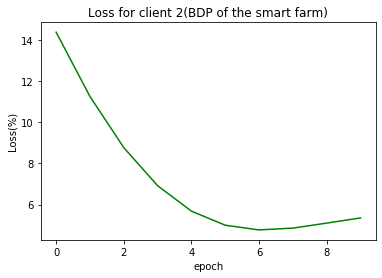

In [21]:
plt.title('Loss for client 2(BDP of the smart farm)')
plt.plot(losses, color='green')
plt.ylabel("Loss(%)")
plt.xlabel("epoch")
plt.show()

### Averaging Model Updates

The Aggregate server combines all the models and get the model updates from different clients and make an aggregation. For this test bed, we use the Data Sceintist server as the coordinator.

### To check if the remote models are different from the base model

In [22]:
param1 = remote_model1.parameters().get(request_block=True)
param2 = remote_model2.parameters().get(request_block=True)

print("Base Model parameters:")
print(base_model.parameters())
print()

print("Remote model1 parameters:")
print(param1)
print()

print("Remote model2 parameters:")
print(param2)

Base Model parameters:
[Parameter containing:
tensor([[0.0617]], requires_grad=True), Parameter containing:
tensor([0.3632], requires_grad=True)]

Remote model1 parameters:
[Parameter containing:
tensor([[0.1608]], requires_grad=True), Parameter containing:
tensor([0.4626], requires_grad=True)]

Remote model2 parameters:
[Parameter containing:
tensor([[0.7753]], requires_grad=True), Parameter containing:
tensor([1.2553], requires_grad=True)]


As you can see, the remote model paramter values are different from the base model paramter values. That means the remote copies of our base model got trained and updated.

In [23]:
remote_model1_updates = remote_model1.get(
    request_block=True
).state_dict()

print(remote_model1_updates)

OrderedDict([('linear.weight', tensor([[0.1608]])), ('linear.bias', tensor([0.4626]))])


In [24]:
remote_model2_updates = remote_model2.get(
    request_block=True
).state_dict()

print(remote_model2_updates)

OrderedDict([('linear.weight', tensor([[0.7753]])), ('linear.bias', tensor([1.2553]))])


In [25]:
from collections import OrderedDict

The aggregation of the weights is computed for 2 clients nodes

In [26]:
avg_updates = OrderedDict()
avg_updates["linear.weight"] = (
    remote_model1_updates["linear.weight"] + remote_model2_updates["linear.weight"]) / 2
avg_updates["linear.bias"] = (
    remote_model1_updates["linear.bias"] + remote_model2_updates["linear.bias"]) / 2
print(avg_updates)

OrderedDict([('linear.weight', tensor([[0.4681]])), ('linear.bias', tensor([0.8590]))])


### Load aggregated weights

In [27]:
combined_model = SyNet(torch)

In [28]:
combined_model.load_state_dict(avg_updates)

In [29]:
del avg_updates, remote_model1_updates, remote_model2_updates

In [30]:
test_data = th.FloatTensor(np.array([5.73,7.18,7.42,7.34,7.88,7.78,7.84,7.94,7.74,7.474,7.84,7.08,7.88,
                                     7.77,7.17,7.38,8.47,5.98,5.93]).reshape(-1,1))

In [49]:
test_target = th.FloatTensor(np.array([3.54,4.17,4.31,4.2,4.47,4.48,4.52,4.59,4.46,4.36,4.52,4.18,4.47,4.22,4.18,
                                       4.28,4.82,3.64,3.63]).reshape(-1,1))

In [71]:
preds = []
correct, wrong =0,0
with torch.no_grad():
    for i in range(len(test_data)):
        sample = test_data[i]
        y_hat = combined_model(sample)
        print(f"Prediction: {y_hat.item()} Ground Truth: {test_target[i].item()}")
        
        if round(y_hat.item(), 1) == round(test_target[i].item(), 1):
            correct += 1
        else:
            wrong +=1
        preds.append(y_hat)
        accuracy = (correct/len(preds)) * 100
        #print(f"{accuracy}=")
        error = round((wrong/len(preds)) * 100, 2)
        print(f"accuracy={accuracy}%: error={error}%")

Prediction: 3.5410001277923584 Ground Truth: 3.5399999618530273
accuracy=100.0%: error=0.0%
Prediction: 4.219703674316406 Ground Truth: 4.170000076293945
accuracy=100.0%: error=0.0%
Prediction: 4.332040786743164 Ground Truth: 4.309999942779541
accuracy=100.0%: error=0.0%
Prediction: 4.294595241546631 Ground Truth: 4.199999809265137
accuracy=75.0%: error=25.0%
Prediction: 4.547353744506836 Ground Truth: 4.46999979019165
accuracy=80.0%: error=20.0%
Prediction: 4.500546455383301 Ground Truth: 4.480000019073486
accuracy=83.33333333333334%: error=16.67%
Prediction: 4.52863073348999 Ground Truth: 4.519999980926514
accuracy=85.71428571428571%: error=14.29%
Prediction: 4.575438022613525 Ground Truth: 4.590000152587891
accuracy=87.5%: error=12.5%
Prediction: 4.481823444366455 Ground Truth: 4.460000038146973
accuracy=88.88888888888889%: error=11.11%
Prediction: 4.357316493988037 Ground Truth: 4.360000133514404
accuracy=90.0%: error=10.0%
Prediction: 4.52863073348999 Ground Truth: 4.5199999809265

In [72]:
accuracy

84.21052631578947

In [77]:
preds

[tensor([3.5410]),
 tensor([4.2197]),
 tensor([4.3320]),
 tensor([4.2946]),
 tensor([4.5474]),
 tensor([4.5005]),
 tensor([4.5286]),
 tensor([4.5754]),
 tensor([4.4818]),
 tensor([4.3573]),
 tensor([4.5286]),
 tensor([4.1729]),
 tensor([4.5474]),
 tensor([4.4959]),
 tensor([4.2150]),
 tensor([4.3133]),
 tensor([4.8235]),
 tensor([3.6580]),
 tensor([3.6346])]

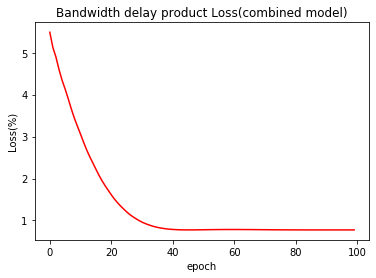

In [78]:
plt.title('Bandwidth delay product Loss(combined model)')
plt.plot(losses, color='red')
plt.ylabel("Loss(%)")
plt.xlabel("epoch")
plt.show()

/home/user_iot/anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/user_iot/anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


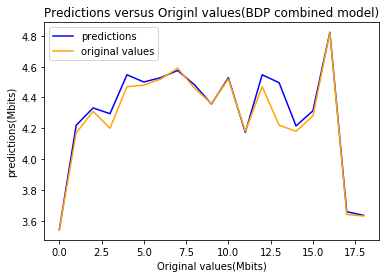

In [81]:
plt.title('Predictions versus Originl values(BDP combined model)')
plt.plot(preds, label='predictions', color='blue')
plt.plot(test_target, label='original values',color='orange')
plt.legend()
plt.xlabel('Original values(Mbits)')
plt.ylabel('predictions(Mbits)')
plt.show()

## Comparison of the federated combine models to classical linear regression on centralised data

In [59]:
import torch
import numpy as np

in_dim = 1
out_dim = 1
class ClassicalLR(torch.nn.Module):
    def __init__(self, torch):
        super(ClassicalLR, self).__init__()
        self.linear = torch.nn.Linear(in_dim, out_dim)
    def forward(self, x):
        x = self.linear(x)
        return x
classical_model = ClassicalLR(torch)

In [60]:
data = torch.FloatTensor(np.array([[0.48,0.48,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0.48,0.48,0.49,0.5,0.49,0.49,0.5,0.53,0.52,0.51,
0.51,0.52,0.5,0.5,0.5,0.52,0.51,0.52,0.56,0.51,0.52,0.53,0.5,0.5,0.5,0.51,0.53,0.51,0.53,0.52,0.53,0.52,0.53,0.53,
0.53,0.53,0.51,0.52,0.51,0.51,0.51,0.51,0.51,0.52,0.51,0.51,0.53,0.5,0.52,0.51,0.53,0.53,0.51,0.51,0.53,0.52,0.53,
0.53,0.53,0.51,0.48,0.49],[6.79,6.63,7.47,6.62,6.67,6.94,7.7,6.31,6.54,6.56,6.36,6.77,6.71,6.83,6.76,6.60,6.72,6.89,6.81,
6.35,6.76,6.5,7.32,6.68,3.49,6.53,7.46,6.89,6.79,6.74,6.81,5.91,6.83,6.8,6.91,6.76,6.85,6.47,6.49,6.93,6.81,6.64,
6.87,6.69,6.80,6.74,6.41,6.18,7.03,6.68,6.46,6.75,6.11,7.40,6.86,6.91,6.97,6.11,6.82,6.97,6.67,6.55,6.72,6.74,6.61,
6.53,6.70,6.58,6.44,7.35,6.61,6.67]]).reshape(-1, 1))

target = torch.FloatTensor(np.array([
    3.22,3.38,3.28,3.20,3.26,3.32,3.25,3.41,3.12,3.56,3.23,3.33,3.51,3.32,3.34,3.32,3.29,2.51,3.11,3.41,2.56,3.03,3.09,
3.14,3.24,3.33,3.26,3.28,3.74,4.00,4.85,4.41,4.53,5.03,4.27,4.42,4.98,4.36,4.79,4.54,3.28,4.89,4.00,4.67,4.52,4.61,
3.96,5.01,4.58,4.42,4.43,7.48,6.19,6.53,6.55,7.93,5.54,4.18,9.44,4.92,3.78,2.72,4.40,4.42,4.67,4.35,4.73,3.86,4.35,
4.62,4.44,4.19,4.59,4.07,4.83,4.31,4.29,4.60,4.37,4.21,4.64,4.28,4.20,4.44,4.22,4.81,4.11,4.12,4.67,4.19,4.69,3.96,
4.31,4.75,4.30,4.52,4.60,4.45,4.76,4.32,3.98,4.35,4.24,4.70,4.41,4.44,4.78,4.35,4.43,4.73,4.44,4.44,3.87,4.15,4.85,
4.39,3.88,4.82,3.78,4.82,4.34,4.29,4.39,4.33,4.50,4.72,4.24,4.57,4.32,4.38,4.83,4.43,4.52,4.03,4.01,4.25,4.01,3.95,
4.26,3.91,4.22,4.01,3.91,4.56 
]).reshape(-1, 1))

In [61]:
def classic_train(iterations, model, torch, optim, data, target, criterion):

    losses = []

    for i in range(iterations):

        optim.zero_grad()

        output = model(data)

        loss = criterion(output, target)

        loss_item = loss.item()

        if i % 10 == 0:
            print("Epoch", i, "loss", loss_item)

        losses.append(loss_item)

        loss.backward()

        optim.step()

    return losses

In [62]:
params = classical_model.parameters()
optim = torch.optim.Adam(params=params, lr=0.1)
criterion = torch.nn.MSELoss()

In [63]:
iteration = 100
losses = classic_train(iteration, classical_model, torch, optim, data, target, criterion)

Epoch 0 loss 5.487094879150391
Epoch 10 loss 3.057192802429199
Epoch 20 loss 1.613039493560791
Epoch 30 loss 0.9605876207351685
Epoch 40 loss 0.7864053249359131
Epoch 50 loss 0.7789658308029175
Epoch 60 loss 0.7849644422531128
Epoch 70 loss 0.7800531983375549
Epoch 80 loss 0.7758877873420715
Epoch 90 loss 0.7751884460449219


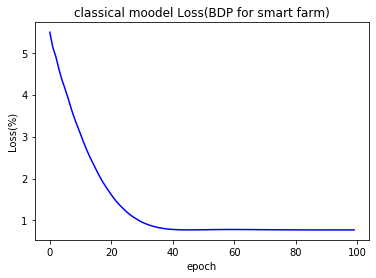

In [64]:
plt.title('classical moodel Loss(BDP for smart farm)')
plt.plot(losses, color='blue')
plt.ylabel("Loss(%)")
plt.xlabel("epoch")
plt.show()

In [65]:
XX_test = th.FloatTensor(np.array([
    0.17,1.18,3.72,5.34,8.38,10.78,8.84,4.44,0.64,16.474,16.84,7.78,16.88,9.77,0.12,
                                     4.38,4.77,1.78,4.35
]).reshape(-1, 1))
yy_test = th.FloatTensor(np.array([4.07,4.12,4.25,4.32,4.42,4.57,4.42,4.22,3.84,4.75,4.85,4.46,4.87,4.45,3.85,
                                       4.27,3.35,4.16,3.82]).reshape(-1, 1))

In [66]:
XX1_test = torch.FloatTensor(np.array(XX_test))
yy1_test = torch.FloatTensor(np.array(yy_test))

In [67]:
preds = []
correct, wrong = 0,0
with torch.no_grad():
    for i in range(len(XX1_test)):
        sample = XX1_test[i]
        y_hat = classical_model(sample)

        print(f"Prediction: {y_hat.item()} Ground Truth: {yy1_test[i].item()}")
        if round(y_hat.item(), 1) == round(test_target[i].item(), 1):
            correct += 1
        else:
            wrong +=1
        
        
        preds.append(y_hat)
        accuracy = round((correct/len(preds)) * 100, 2)
        error = round((wrong/len(preds)) * 100, 2)
        print(f"accuracy={accuracy}%: error={error}%")
        

Prediction: 4.165571689605713 Ground Truth: 4.070000171661377
accuracy=0.0%: error=100.0%
Prediction: 4.197052001953125 Ground Truth: 4.119999885559082
accuracy=50.0%: error=50.0%
Prediction: 4.276219367980957 Ground Truth: 4.25
accuracy=66.67%: error=33.33%
Prediction: 4.326712608337402 Ground Truth: 4.320000171661377
accuracy=50.0%: error=50.0%
Prediction: 4.421464443206787 Ground Truth: 4.420000076293945
accuracy=40.0%: error=60.0%
Prediction: 4.4962687492370605 Ground Truth: 4.570000171661377
accuracy=50.0%: error=50.0%
Prediction: 4.435801982879639 Ground Truth: 4.420000076293945
accuracy=42.86%: error=57.14%
Prediction: 4.298660755157471 Ground Truth: 4.21999979019165
accuracy=37.5%: error=62.5%
Prediction: 4.180221080780029 Ground Truth: 3.8399999141693115
accuracy=33.33%: error=66.67%
Prediction: 4.673741817474365 Ground Truth: 4.75
accuracy=30.0%: error=70.0%
Prediction: 4.685149192810059 Ground Truth: 4.849999904632568
accuracy=27.27%: error=72.73%
Prediction: 4.4027633666992

/home/user_iot/anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/user_iot/anaconda3/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


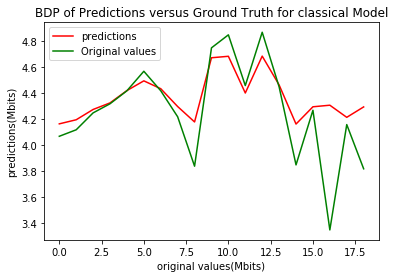

In [68]:
plt.title('BDP of Predictions versus Ground Truth for classical Model')
plt.plot(preds, label='predictions',color="red")
plt.plot(yy1_test, label='Original values',color="green")
plt.legend()
plt.xlabel('original values(Mbits)')
plt.ylabel('predictions(Mbits)')
plt.show()